In [1]:
# -- Set a GPS time:
t0 = 1187008882.4    # -- GW150914

#-- Choose detector as H1, L1, or V1
detector = 'H1'

In [2]:
import requests, os
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'

try:
    from gwpy.timeseries import TimeSeries
except:
    ! pip install -q gwpy
    from gwpy.timeseries import TimeSeries  

In [3]:
from gwosc.locate import get_urls
url = get_urls(detector, t0, t0)[-1]

print('Downloading: ' , url)
fn = os.path.basename(url)
with open(fn,'wb') as strainfile:                 
    straindata = requests.get(url)
    strainfile.write(straindata.content)

Downloading:  https://www.gw-openscience.org/eventapi/json/GWTC-1-confident/GW170817/v3/H-H1_GWOSC_4KHZ_R1-1187006835-4096.hdf5


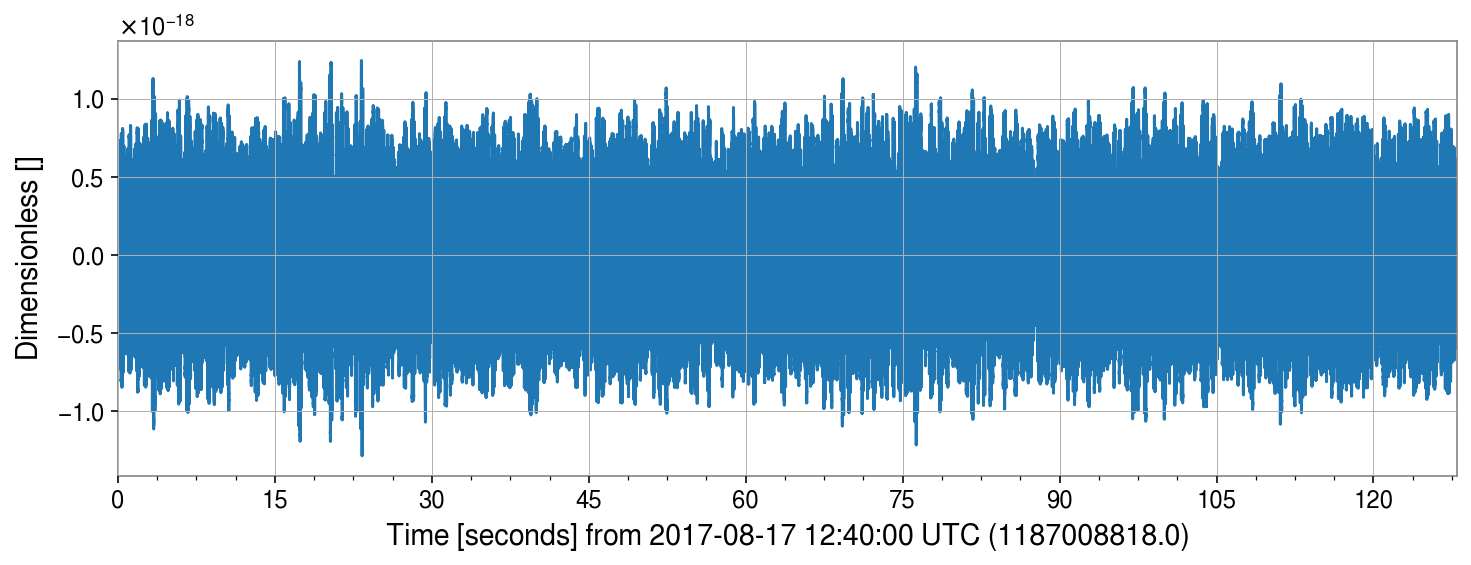

In [29]:
# -- Read strain data
strain = TimeSeries.read(fn,format='hdf5.losc')
center = int(t0)
strain = strain.crop(center-64, center+64)
fig1 = strain.plot()

(1e-24, 1e-19)

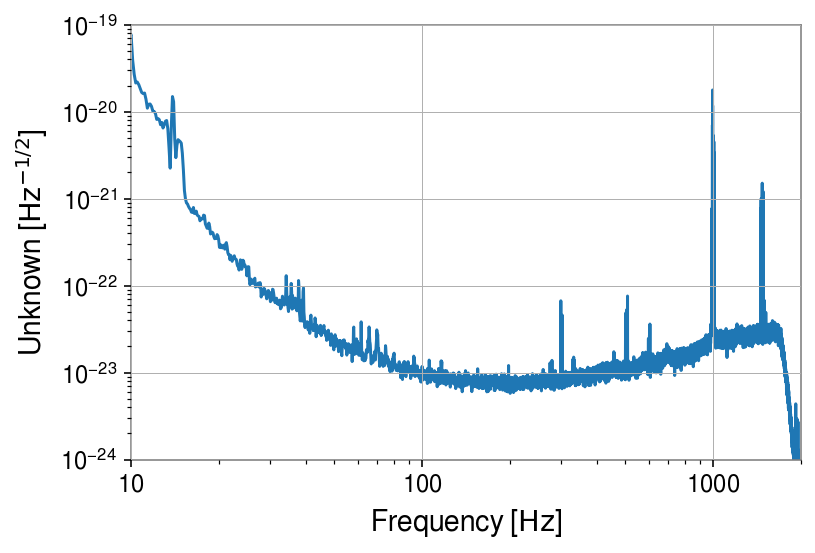

In [30]:
# -- Plot ASD
fig2 = strain.asd(fftlength=8).plot()
plt.xlim(10,2000)
plt.ylim(1e-24, 1e-19)

(1187008852.4, 1187008882.5)

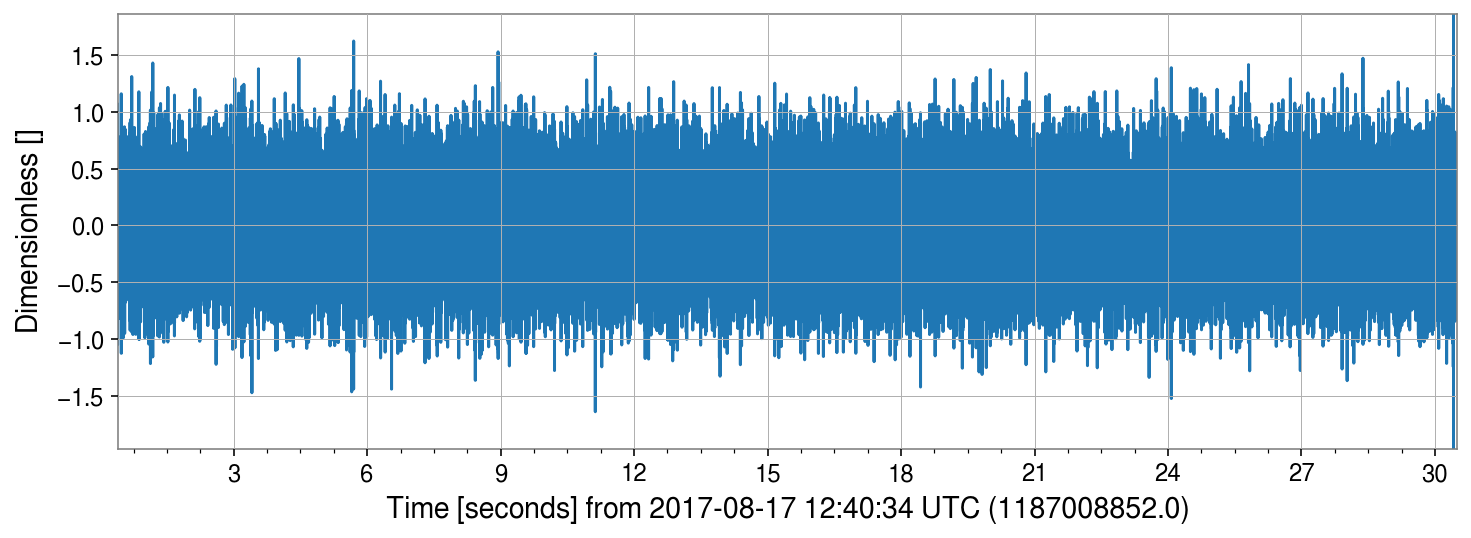

In [31]:
# -- Whiten and bandpass data

time_range = (t0 - 30, t0+.1)

white_data = strain.whiten()
bp_data = white_data.bandpass(200, 600)
fig3 = bp_data.plot()
plt.axvline(t0)

plt.xlim(*time_range)

(10, 1000)

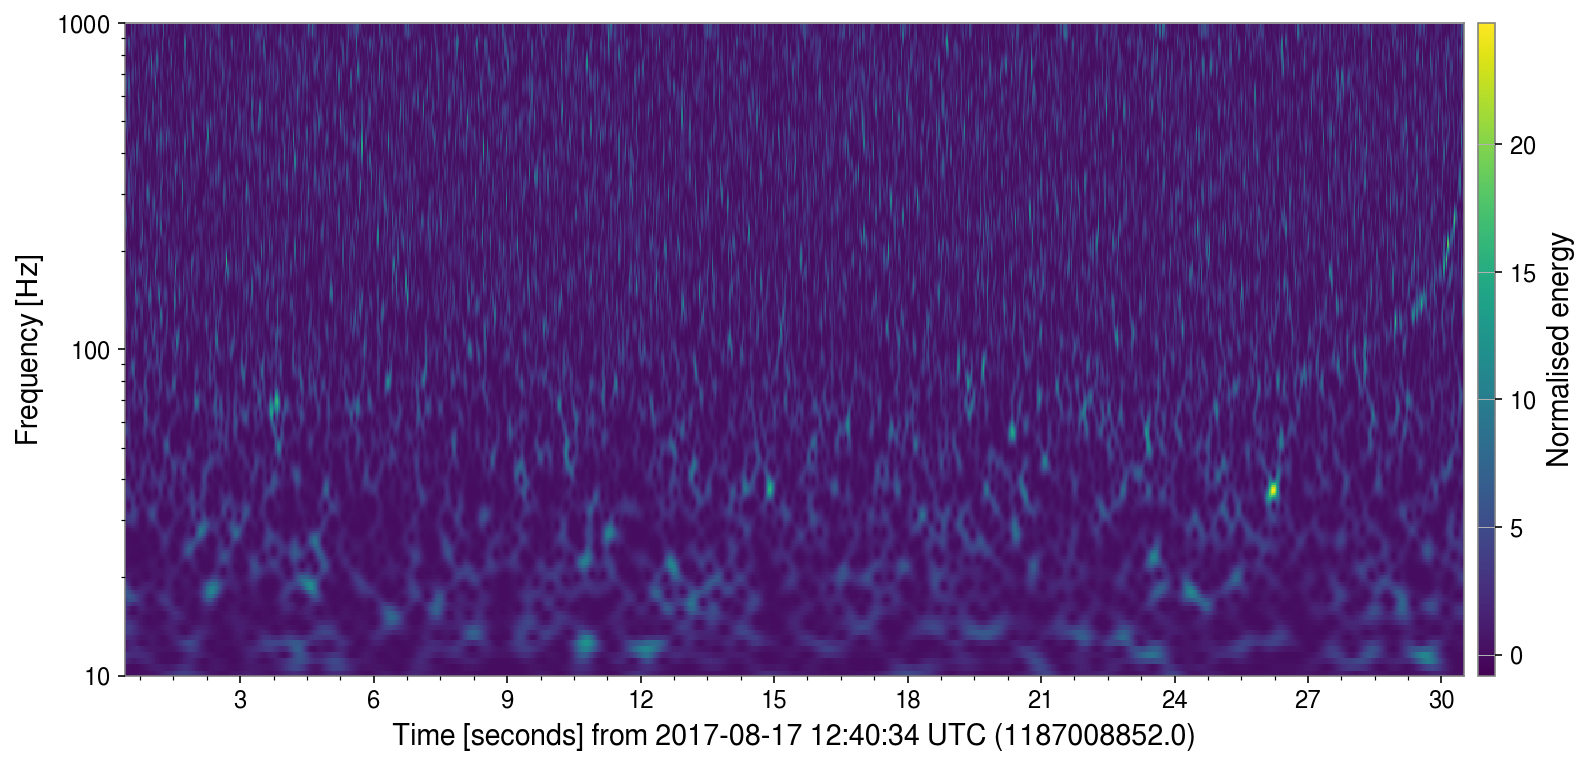

In [39]:
hq = strain.q_transform(
    outseg=time_range, 
    whiten=strain.asd(fftlength=8),
    q_range=(4, 16)
)
fig4 = hq.plot()
ax = fig4.gca()
fig4.colorbar(label="Normalised energy")
ax.grid(False)
ax.set_yscale('log')
plt.xlim(*time_range)
plt.ylim(10, 1000)